In [1]:
import matplotlib.pyplot  as plt
import os
import glob
import cv2

In [2]:
result_path="/media/bikram/Samsung_T5/results/grid1616"
image_path="/media/bikram/Samsung_T5/raw_data/test/camera_images"

In [4]:
all_gaze_files = glob.glob(result_path+"/*.png")
all_gaze_files.sort()

/tmp/ipykernel_1141414/3655103035.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3)


Error in callback <function _draw_all_if_interactive at 0x7ff4c9b1ea70> (for post_execute):


KeyboardInterrupt: 

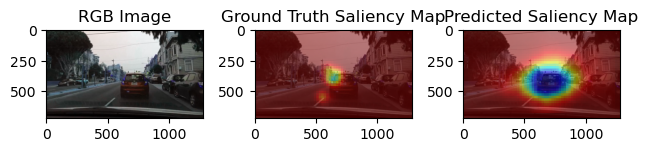

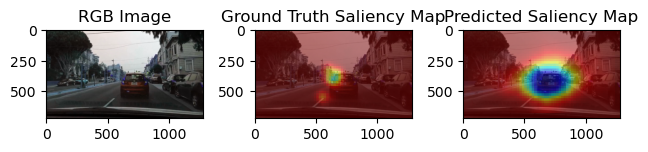

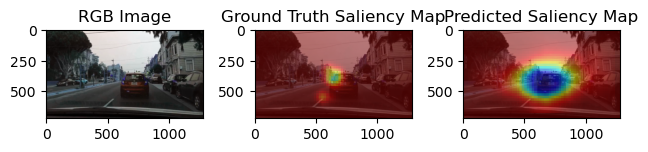

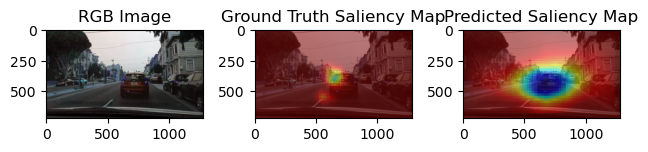

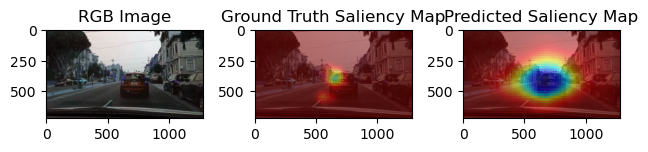

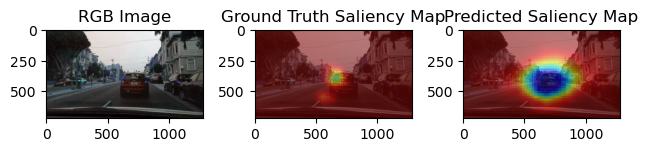

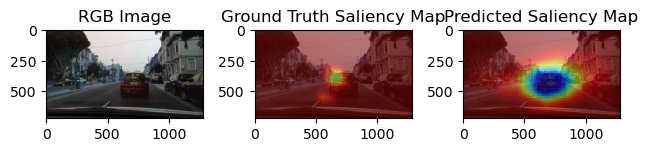

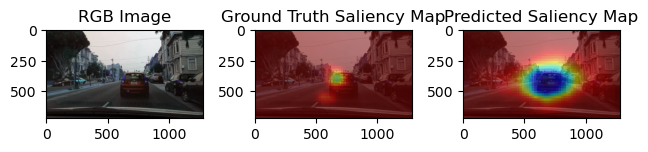

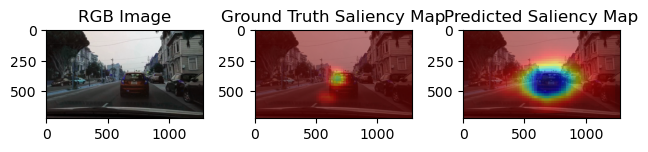

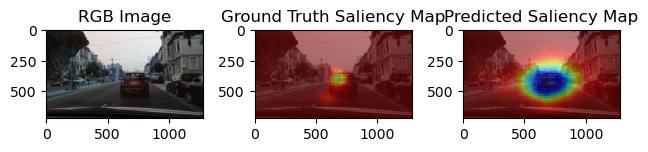

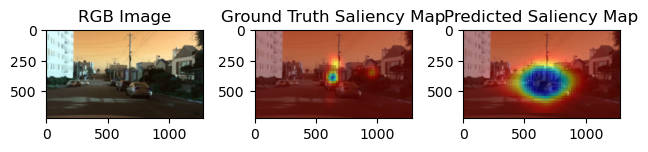

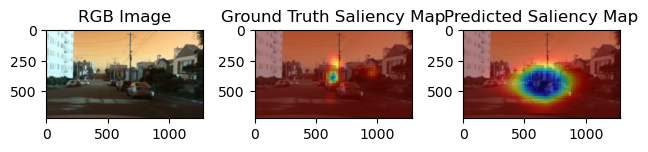

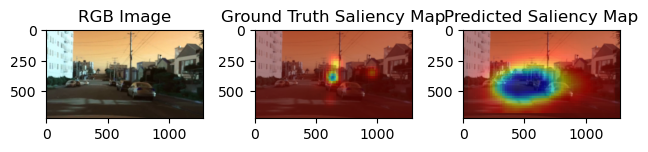

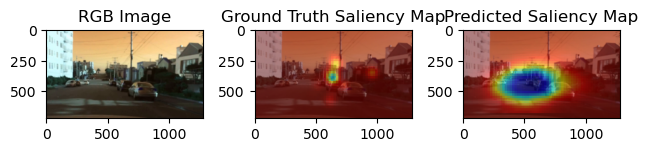

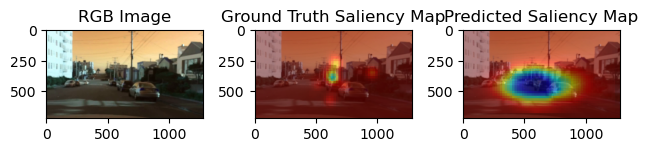

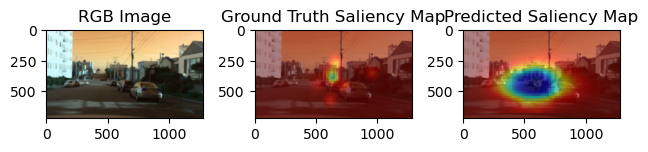

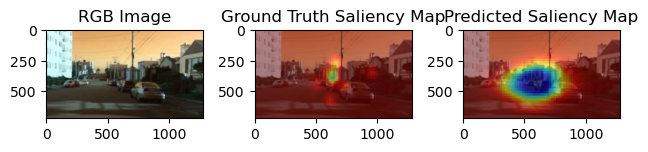

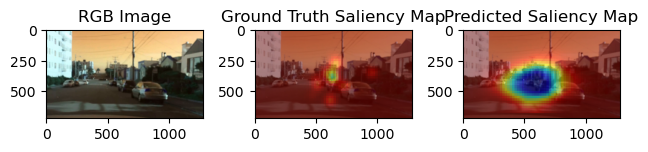

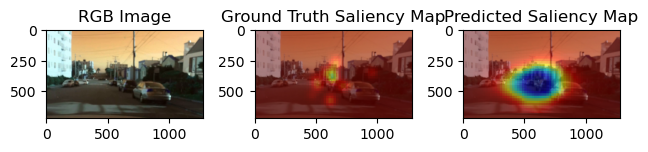

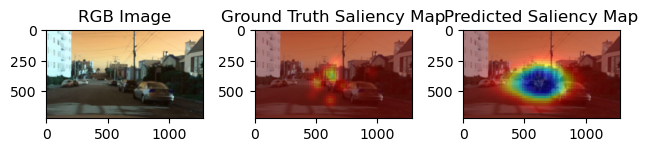

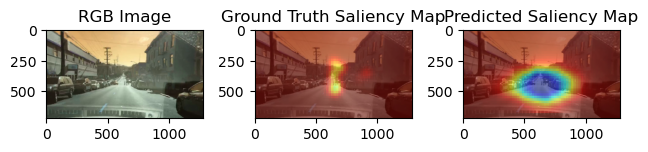

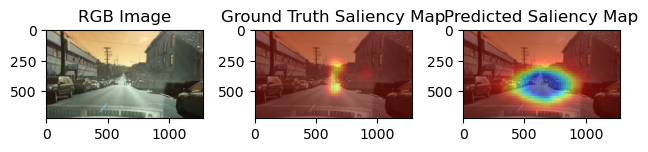

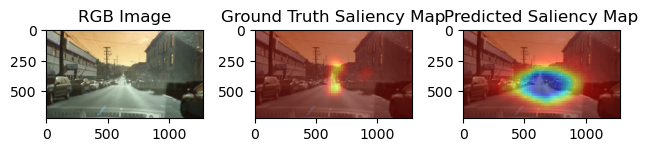

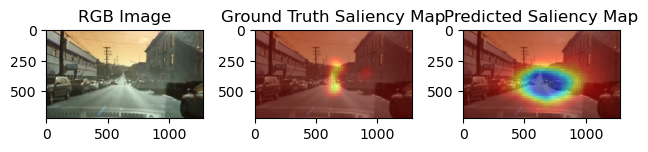

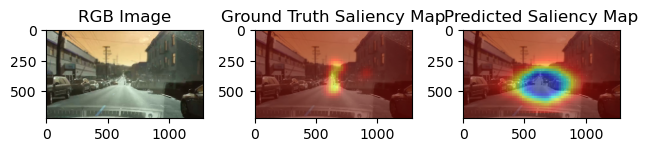

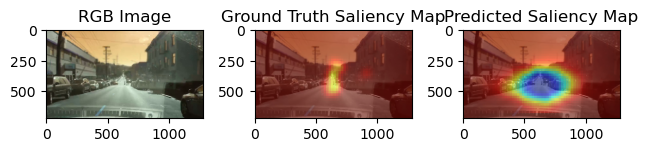

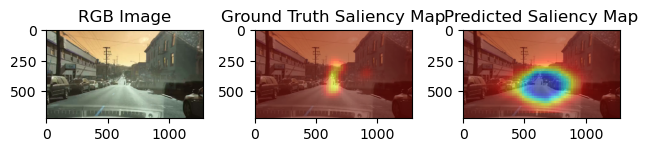

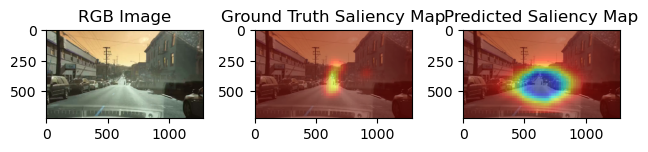

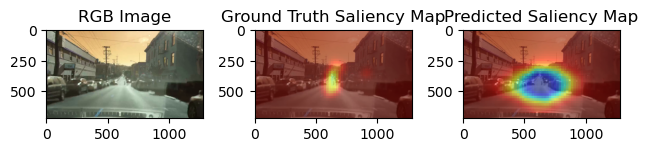

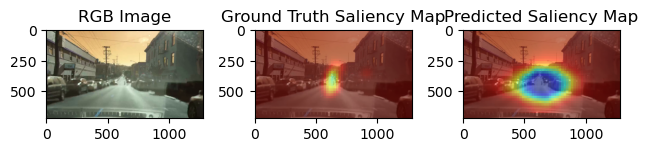

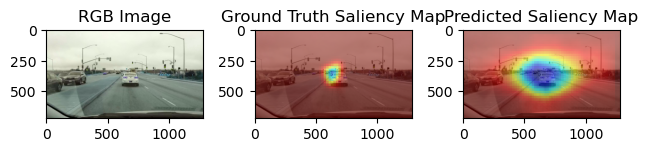

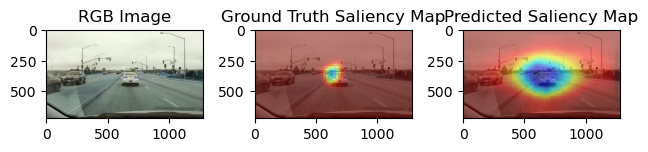

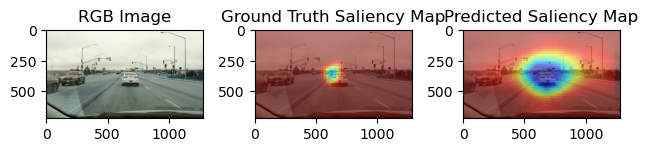

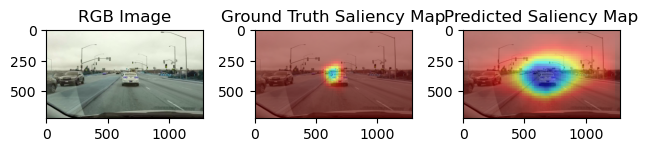

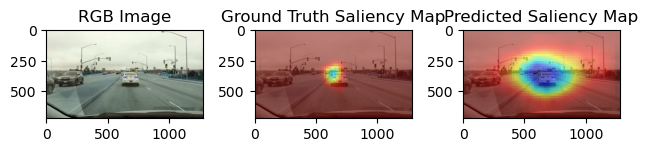

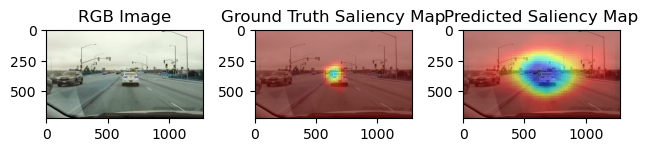

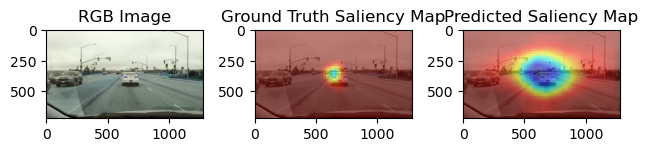

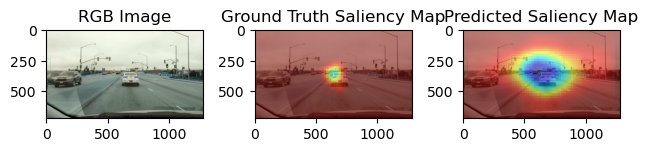

In [5]:
i = 0
for i in range(len(all_gaze_files)):
    if("gt" in all_gaze_files[i]):
        individual_slaces=all_gaze_files[i].split("/")
        individual_filename = individual_slaces[6].split("_")
        foldername=individual_filename[0]
        if not os.path.exists("/media/bikram/Samsung_T5/results/"+foldername):
            os.makedirs("/media/bikram/Samsung_T5/results/"+foldername)
        
        img=cv2.imread(image_path+"/"+individual_filename[0]+"_"+individual_filename[1]+".jpg")
        gazemap_actual_img = cv2.imread(all_gaze_files[i])
        gazemap_pred_img = cv2.imread(all_gaze_files[i+1])
        
        gazemap_resized_actual=cv2.resize(gazemap_actual_img,(img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
        gazemap_resized_pred=cv2.resize(gazemap_pred_img,(img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
    

        heatmap_actual_img = cv2.applyColorMap(gazemap_resized_actual, cv2.COLORMAP_JET)
        heatmap_pred_img = cv2.applyColorMap(gazemap_resized_pred, cv2.COLORMAP_JET)

        super_imposed_actual_image = cv2.addWeighted(heatmap_actual_img, 0.5, img, 0.5, 0)
        super_imposed_pred_image=cv2.addWeighted(heatmap_pred_img, 0.5, img, 0.5, 0)

        fig, ax = plt.subplots(1,3)

        ax[0].imshow(img)
        ax[1].imshow(super_imposed_actual_image)
        ax[2].imshow(super_imposed_pred_image)
        # folder_name=all_gaze_files[i]
        ax[0].set_title("RGB Image")
        ax[1].set_title("Ground Truth Saliency Map")
        ax[2].set_title("Predicted Saliency Map")

        fig.tight_layout()
        fig.savefig("/media/bikram/Samsung_T5/results/"+foldername+"/"+individual_filename[0]+"_"+individual_filename[1]+".png")
        # print(folder_name)
    i+=2
plt.close()

In [3]:
result_folder_path="/media/bikram/Samsung_T5/results"

In [4]:
result_folders=os.listdir(result_folder_path)
result_folders.sort()

In [9]:
for individual_folder in result_folders:
    if "grid" not in individual_folder:
        image_folder = result_folder_path+"/"+individual_folder
        images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
        frame = cv2.imread(os.path.join(image_folder, images[0]))
        height, width, layers = frame.shape

        video = cv2.VideoWriter(image_folder+"/video.avi", 0, 10, (width,height))

        for image in images:
            video.write(cv2.imread(os.path.join(image_folder, image)))

        cv2.destroyAllWindows()
        video.release()